# Predicting Credit Card Default

by Bima Putra Pratama

---

## 1. Introduction

### Backgrounds


### Goals
This projects aim to create a model that are able to predict the customer credit card default. 

## 2. Dataset 
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005. This dataset can be downloaded from this [link](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset).

There are 25 variables in this dataset with detail as below:

* **ID**: ID of each client
* **LIMIT_BAL**: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* **SEX**: Gender (1=male, 2=female)
* **EDUCATION**: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* **MARRIAGE**: Marital status (1=married, 2=single, 3=others)
* **AGE**: Age in years
* **PAY_0**: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
* **PAY_2**: Repayment status in August, 2005 (scale same as above)
* **PAY_3**: Repayment status in July, 2005 (scale same as above)
* **PAY_4**: Repayment status in June, 2005 (scale same as above)
* **PAY_5**: Repayment status in May, 2005 (scale same as above)
* **PAY_6**: Repayment status in April, 2005 (scale same as above)
* **BILL_AMT1**: Amount of bill statement in September, 2005 (NT dollar)
* **BILL_AMT2**: Amount of bill statement in August, 2005 (NT dollar)
* **BILL_AMT3**: Amount of bill statement in July, 2005 (NT dollar)
* **BILL_AMT4**: Amount of bill statement in June, 2005 (NT dollar)
* **BILL_AMT5**: Amount of bill statement in May, 2005 (NT dollar)
* **BILL_AMT6**: Amount of bill statement in April, 2005 (NT dollar)
* **PAY_AMT1**: Amount of previous payment in September, 2005 (NT dollar)
* **PAY_AMT2**: Amount of previous payment in August, 2005 (NT dollar)
* **PAY_AMT3**: Amount of previous payment in July, 2005 (NT dollar)
* **PAY_AMT4**: Amount of previous payment in June, 2005 (NT dollar)
* **PAY_AMT5**: Amount of previous payment in May, 2005 (NT dollar)
* **PAY_AMT6**: Amount of previous payment in April, 2005 (NT dollar)
* **default.payment.next.month**: Default payment (1=yes, 0=no)

## 3. Methodology

There are main steps in the process to create a model that can be used to predict our target values:
1. Data Preparation
2. Exploratory Data Analysis
3. Model Creation
4. Model Evaluation and Selection

### Data Preparation

In [5]:
# Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.max_columns', None)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [26]:
# Import Dataset
df = pd.read_csv('/content/drive/My Drive/Dataset/UCI_Credit_Card.csv')
df.head(5).T

0         1        2        3        4
ID                              1.0       2.0      3.0      4.0      5.0
LIMIT_BAL                   20000.0  120000.0  90000.0  50000.0  50000.0
SEX                             2.0       2.0      2.0      2.0      1.0
EDUCATION                       2.0       2.0      2.0      2.0      2.0
MARRIAGE                        1.0       2.0      2.0      1.0      1.0
AGE                            24.0      26.0     34.0     37.0     57.0
PAY_0                           2.0      -1.0      0.0      0.0     -1.0
PAY_2                           2.0       2.0      0.0      0.0      0.0
PAY_3                          -1.0       0.0      0.0      0.0     -1.0
PAY_4                          -1.0       0.0      0.0      0.0      0.0
PAY_5                          -2.0       0.0      0.0      0.0      0.0
PAY_6                          -2.0       2.0      0.0      0.0      0.0
BILL_AMT1                    3913.0    2682.0  29239.0  46990.0   8617.0
BILL_AMT2                    3102.0    1725.0  14027.0  48233.0   5670.0
BILL_AMT3                     689.0    2682.0  13559.0  49291.0  35835.0
BILL_AMT4                       0.0    3272.0  14331.0  28314.0  20940.0
BILL_AMT5                       0.0    3455.0  14948.0  28959.0  19146.0
BILL_AMT6                       0.0    3261.0  15549.0  29547.0  19131.0
PAY_AMT1                        0.0       0.0   1518.0   2000.0   2000.0
PAY_AMT2                      689.0    1000.0   1500.0   2019.0  36681.0
PAY_AMT3                        0.0    1000.0   1000.0   1200.0  10000.0
PAY_AMT4                        0.0    1000.0   1000.0   1100.0   9000.0
PAY_AMT5                        0.0       0.0   1000.0   1069.0    689.0
PAY_AMT6                        0.0    2000.0   5000.0   1000.0    679.0
default.payment.next.month      1.0       1.0      0.0      0.0      0.0

There are two column name that I decided to change the name so it can be more consistent and easy to understand:
- PAY_0 = PAY_1
- default.payment.next.month = default_pay

In [27]:
# Rename columns
df = df.rename(columns={"PAY_0":"PAY_1","default.payment.next.month":"DEFAULT_PAY"})
print(df.columns)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DEFAULT_PAY'],
      dtype='object')


In [28]:
# Create a data summary

def data_summaries(df, pred=None):
    """ This function used to print summary of the data
    
    Args:
    df = dataframe that will be describes
    pred = Target column tha will be predict
    
    Output:
    Dataset summaries

    """
    obs = df.shape[0]
    types = df.dtypes
    row_counts = df.count()
    uniques = df.nunique()
    missing_values = df.isna().sum()
    missing_ratio = (df.isna().sum()/ obs) * 100
    distinct_values = df.apply(lambda x: [x.unique()])
    skewness = df.skew()
    stat = df.describe().round(2).T
    
    print ("DATA SUMMARIES")
    print ("\n----- Data Shape -----\n")
    print('Total Rows:', df.shape[0])
    print('Total Columns:', df.shape[1])
    print('Duplicate Records:', df.duplicated().sum())
    
    overview_cols = ['types', 'counts', 'distincts', 'missing count',
                     'missing ratio', 'distinct values']
    overview = pd.concat([types, row_counts, uniques, missing_values,
                          missing_ratio, distinct_values], axis = 1)
    overview.columns = overview_cols
    
    if pred is None:
        stat_cols = ['mean', 'std', 'min', '25%', '50%', '75%', 'max',
                     'skewness']
        data_stat = pd.concat([stat['mean'], stat['std'], stat['min'],
                               stat['25%'], stat['50%'], stat['75%'],
                               stat['max'],skewness],
                               axis = 1,
                               join = 'inner')

    else:
        corr = df.corr()[pred]
        data_stat = pd.concat([stat['mean'], stat['std'], stat['min'],
                               stat['25%'], stat['50%'], stat['75%'],
                               stat['max'],skewness, corr],
                               axis = 1, join = 'inner')
        corr_col = 'corr '  + pred
        stat_cols = ['mean', 'std', 'min', '25%', '50%', '75%', 'max',
                     'skewness',  corr_col ]
    
    data_stat.columns = stat_cols
    
    print('\n----- Data Overview -----\n')
    display(overview)
    print('\n----- Descriptive Statistics -----\n')
    
    return data_stat


data_summaries(df,pred='DEFAULT_PAY')

DATA SUMMARIES

----- Data Shape -----

Total Rows: 30000
Total Columns: 25
Duplicate Records: 0

----- Data Overview -----



types  counts  distincts  missing count  missing ratio  \
ID             int64   30000      30000              0            0.0   
LIMIT_BAL    float64   30000         81              0            0.0   
SEX            int64   30000          2              0            0.0   
EDUCATION      int64   30000          7              0            0.0   
MARRIAGE       int64   30000          4              0            0.0   
AGE            int64   30000         56              0            0.0   
PAY_1          int64   30000         11              0            0.0   
PAY_2          int64   30000         11              0            0.0   
PAY_3          int64   30000         11              0            0.0   
PAY_4          int64   30000         11              0            0.0   
PAY_5          int64   30000         10              0            0.0   
PAY_6          int64   30000         10              0            0.0   
BILL_AMT1    float64   30000      22723              0            0.0   
BILL_AMT2    float64   30000      22346              0            0.0   
BILL_AMT3    float64   30000      22026              0            0.0   
BILL_AMT4    float64   30000      21548              0            0.0   
BILL_AMT5    float64   30000      21010              0            0.0   
BILL_AMT6    float64   30000      20604              0            0.0   
PAY_AMT1     float64   30000       7943              0            0.0   
PAY_AMT2     float64   30000       7899              0            0.0   
PAY_AMT3     float64   30000       7518              0            0.0   
PAY_AMT4     float64   30000       6937              0            0.0   
PAY_AMT5     float64   30000       6897              0            0.0   
PAY_AMT6     float64   30000       6939              0            0.0   
DEFAULT_PAY    int64   30000          2              0            0.0   

                                               distinct values  
ID           [[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0,...  
LIMIT_BAL    [[20000.0, 120000.0, 90000.0, 50000.0, 500000....  
SEX                                               [[2.0, 1.0]]  
EDUCATION                [[2.0, 1.0, 3.0, 5.0, 4.0, 6.0, 0.0]]  
MARRIAGE                                [[1.0, 2.0, 3.0, 0.0]]  
AGE          [[24.0, 26.0, 34.0, 37.0, 57.0, 29.0, 23.0, 28...  
PAY_1        [[2.0, -1.0, 0.0, -2.0, 1.0, 3.0, 4.0, 8.0, 7....  
PAY_2        [[2.0, 0.0, -1.0, -2.0, 3.0, 5.0, 7.0, 4.0, 1....  
PAY_3        [[-1.0, 0.0, 2.0, -2.0, 3.0, 4.0, 6.0, 7.0, 1....  
PAY_4        [[-1.0, 0.0, -2.0, 2.0, 3.0, 4.0, 5.0, 7.0, 6....  
PAY_5        [[-2.0, 0.0, -1.0, 2.0, 3.0, 5.0, 4.0, 7.0, 8....  
PAY_6        [[-2.0, 2.0, 0.0, -1.0, 3.0, 6.0, 4.0, 7.0, 8....  
BILL_AMT1    [[3913.0, 2682.0, 29239.0, 46990.0, 8617.0, 64...  
BILL_AMT2    [[3102.0, 1725.0, 14027.0, 48233.0, 5670.0, 57...  
BILL_AMT3    [[689.0, 2682.0, 13559.0, 49291.0, 35835.0, 57...  
BILL_AMT4    [[0.0, 3272.0, 14331.0, 28314.0, 20940.0, 1939...  
BILL_AMT5    [[0.0, 3455.0, 14948.0, 28959.0, 19146.0, 1961...  
BILL_AMT6    [[0.0, 3261.0, 15549.0, 29547.0, 19131.0, 2002...  
PAY_AMT1     [[0.0, 1518.0, 2000.0, 2500.0, 55000.0, 380.0,...  
PAY_AMT2     [[689.0, 1000.0, 1500.0, 2019.0, 36681.0, 1815...  
PAY_AMT3     [[0.0, 1000.0, 1200.0, 10000.0, 657.0, 38000.0...  
PAY_AMT4     [[0.0, 1000.0, 1100.0, 9000.0, 20239.0, 581.0,...  
PAY_AMT5     [[0.0, 1000.0, 1069.0, 689.0, 13750.0, 1687.0,...  
PAY_AMT6     [[0.0, 2000.0, 5000.0, 1000.0, 679.0, 800.0, 1...  
DEFAULT_PAY                                       [[1.0, 0.0]]


----- Descriptive Statistics -----



mean        std       min       25%       50%        75%  \
ID            15000.50    8660.40       1.0   7500.75   15000.5   22500.25   
LIMIT_BAL    167484.32  129747.66   10000.0  50000.00  140000.0  240000.00   
SEX               1.60       0.49       1.0      1.00       2.0       2.00   
EDUCATION         1.85       0.79       0.0      1.00       2.0       2.00   
MARRIAGE          1.55       0.52       0.0      1.00       2.0       2.00   
AGE              35.49       9.22      21.0     28.00      34.0      41.00   
PAY_1            -0.02       1.12      -2.0     -1.00       0.0       0.00   
PAY_2            -0.13       1.20      -2.0     -1.00       0.0       0.00   
PAY_3            -0.17       1.20      -2.0     -1.00       0.0       0.00   
PAY_4            -0.22       1.17      -2.0     -1.00       0.0       0.00   
PAY_5            -0.27       1.13      -2.0     -1.00       0.0       0.00   
PAY_6            -0.29       1.15      -2.0     -1.00       0.0       0.00   
BILL_AMT1     51223.33   73635.86 -165580.0   3558.75   22381.5   67091.00   
BILL_AMT2     49179.08   71173.77  -69777.0   2984.75   21200.0   64006.25   
BILL_AMT3     47013.15   69349.39 -157264.0   2666.25   20088.5   60164.75   
BILL_AMT4     43262.95   64332.86 -170000.0   2326.75   19052.0   54506.00   
BILL_AMT5     40311.40   60797.16  -81334.0   1763.00   18104.5   50190.50   
BILL_AMT6     38871.76   59554.11 -339603.0   1256.00   17071.0   49198.25   
PAY_AMT1       5663.58   16563.28       0.0   1000.00    2100.0    5006.00   
PAY_AMT2       5921.16   23040.87       0.0    833.00    2009.0    5000.00   
PAY_AMT3       5225.68   17606.96       0.0    390.00    1800.0    4505.00   
PAY_AMT4       4826.08   15666.16       0.0    296.00    1500.0    4013.25   
PAY_AMT5       4799.39   15278.31       0.0    252.50    1500.0    4031.50   
PAY_AMT6       5215.50   17777.47       0.0    117.75    1500.0    4000.00   
DEFAULT_PAY       0.22       0.42       0.0      0.00       0.0       0.00   

                   max      skewness  corr DEFAULT_PAY  
ID             30000.0 -2.566130e-17         -0.013952  
LIMIT_BAL    1000000.0  9.928670e-01         -0.153520  
SEX                2.0 -4.241834e-01         -0.039961  
EDUCATION          6.0  9.709720e-01          0.028006  
MARRIAGE           3.0 -1.874168e-02         -0.024339  
AGE               79.0  7.322459e-01          0.013890  
PAY_1              8.0  7.319749e-01          0.324794  
PAY_2              8.0  7.905650e-01          0.263551  
PAY_3              8.0  8.406818e-01          0.235253  
PAY_4              8.0  9.996294e-01          0.216614  
PAY_5              8.0  1.008197e+00          0.204149  
PAY_6              8.0  9.480294e-01          0.186866  
BILL_AMT1     964511.0  2.663861e+00         -0.019644  
BILL_AMT2     983931.0  2.705221e+00         -0.014193  
BILL_AMT3    1664089.0  3.087830e+00         -0.014076  
BILL_AMT4     891586.0  2.821965e+00         -0.010156  
BILL_AMT5     927171.0  2.876380e+00         -0.006760  
BILL_AMT6     961664.0  2.846645e+00         -0.005372  
PAY_AMT1      873552.0  1.466836e+01         -0.072929  
PAY_AMT2     1684259.0  3.045382e+01         -0.058579  
PAY_AMT3      896040.0  1.721664e+01         -0.056250  
PAY_AMT4      621000.0  1.290498e+01         -0.056827  
PAY_AMT5      426529.0  1.112742e+01         -0.055124  
PAY_AMT6      528666.0  1.064073e+01         -0.053183  
DEFAULT_PAY        1.0  1.343504e+00          1.000000

By examining the data sumary we can conclude that this dataset:
- Have 30,000 unique card records 
- Doesn't have missing values
- Marriage and Education has values = 0.0 which are not mentioned so I decided to change the data values to other categories in both features in the next step.
- There are no features that strongly correlated (corr > 0.7) to our target variables

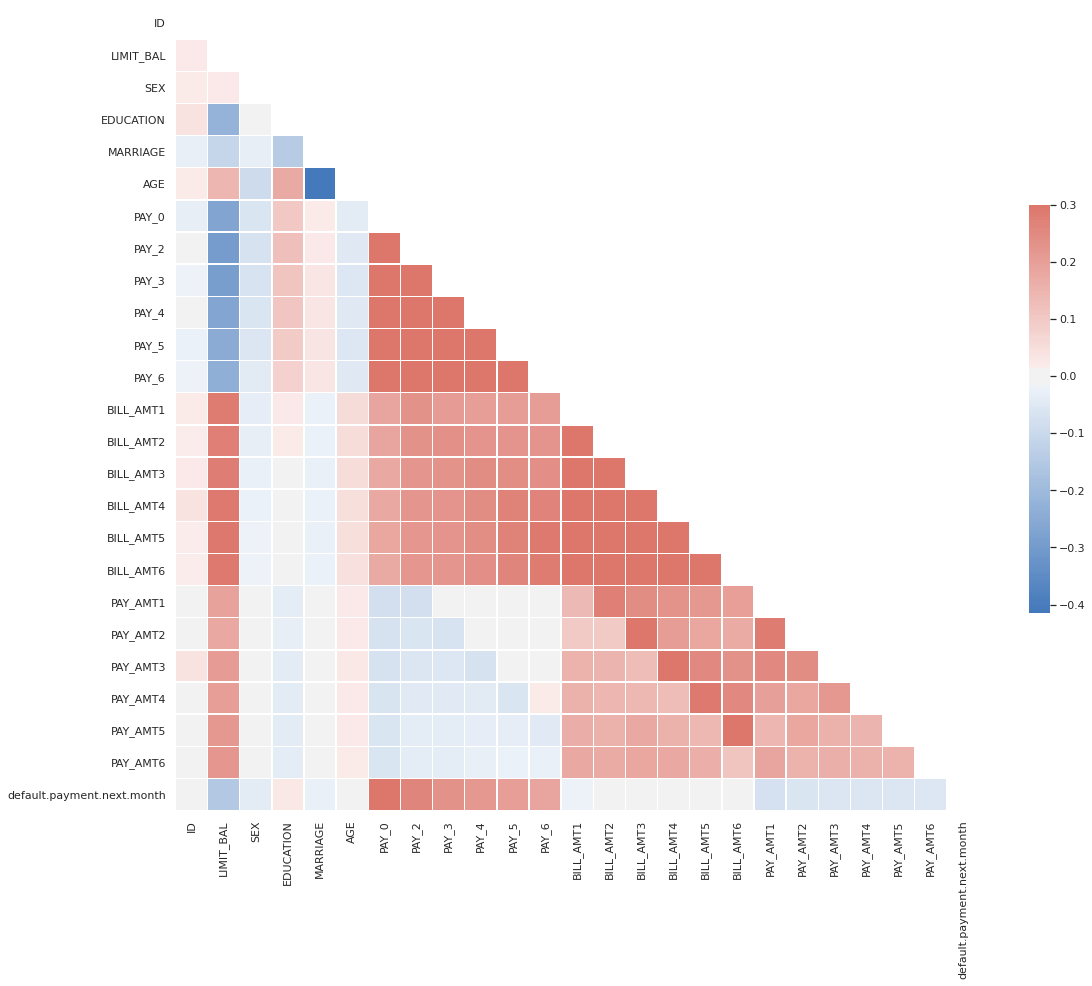

In [15]:
# Create a heatmap off correlation plot 

sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 15, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

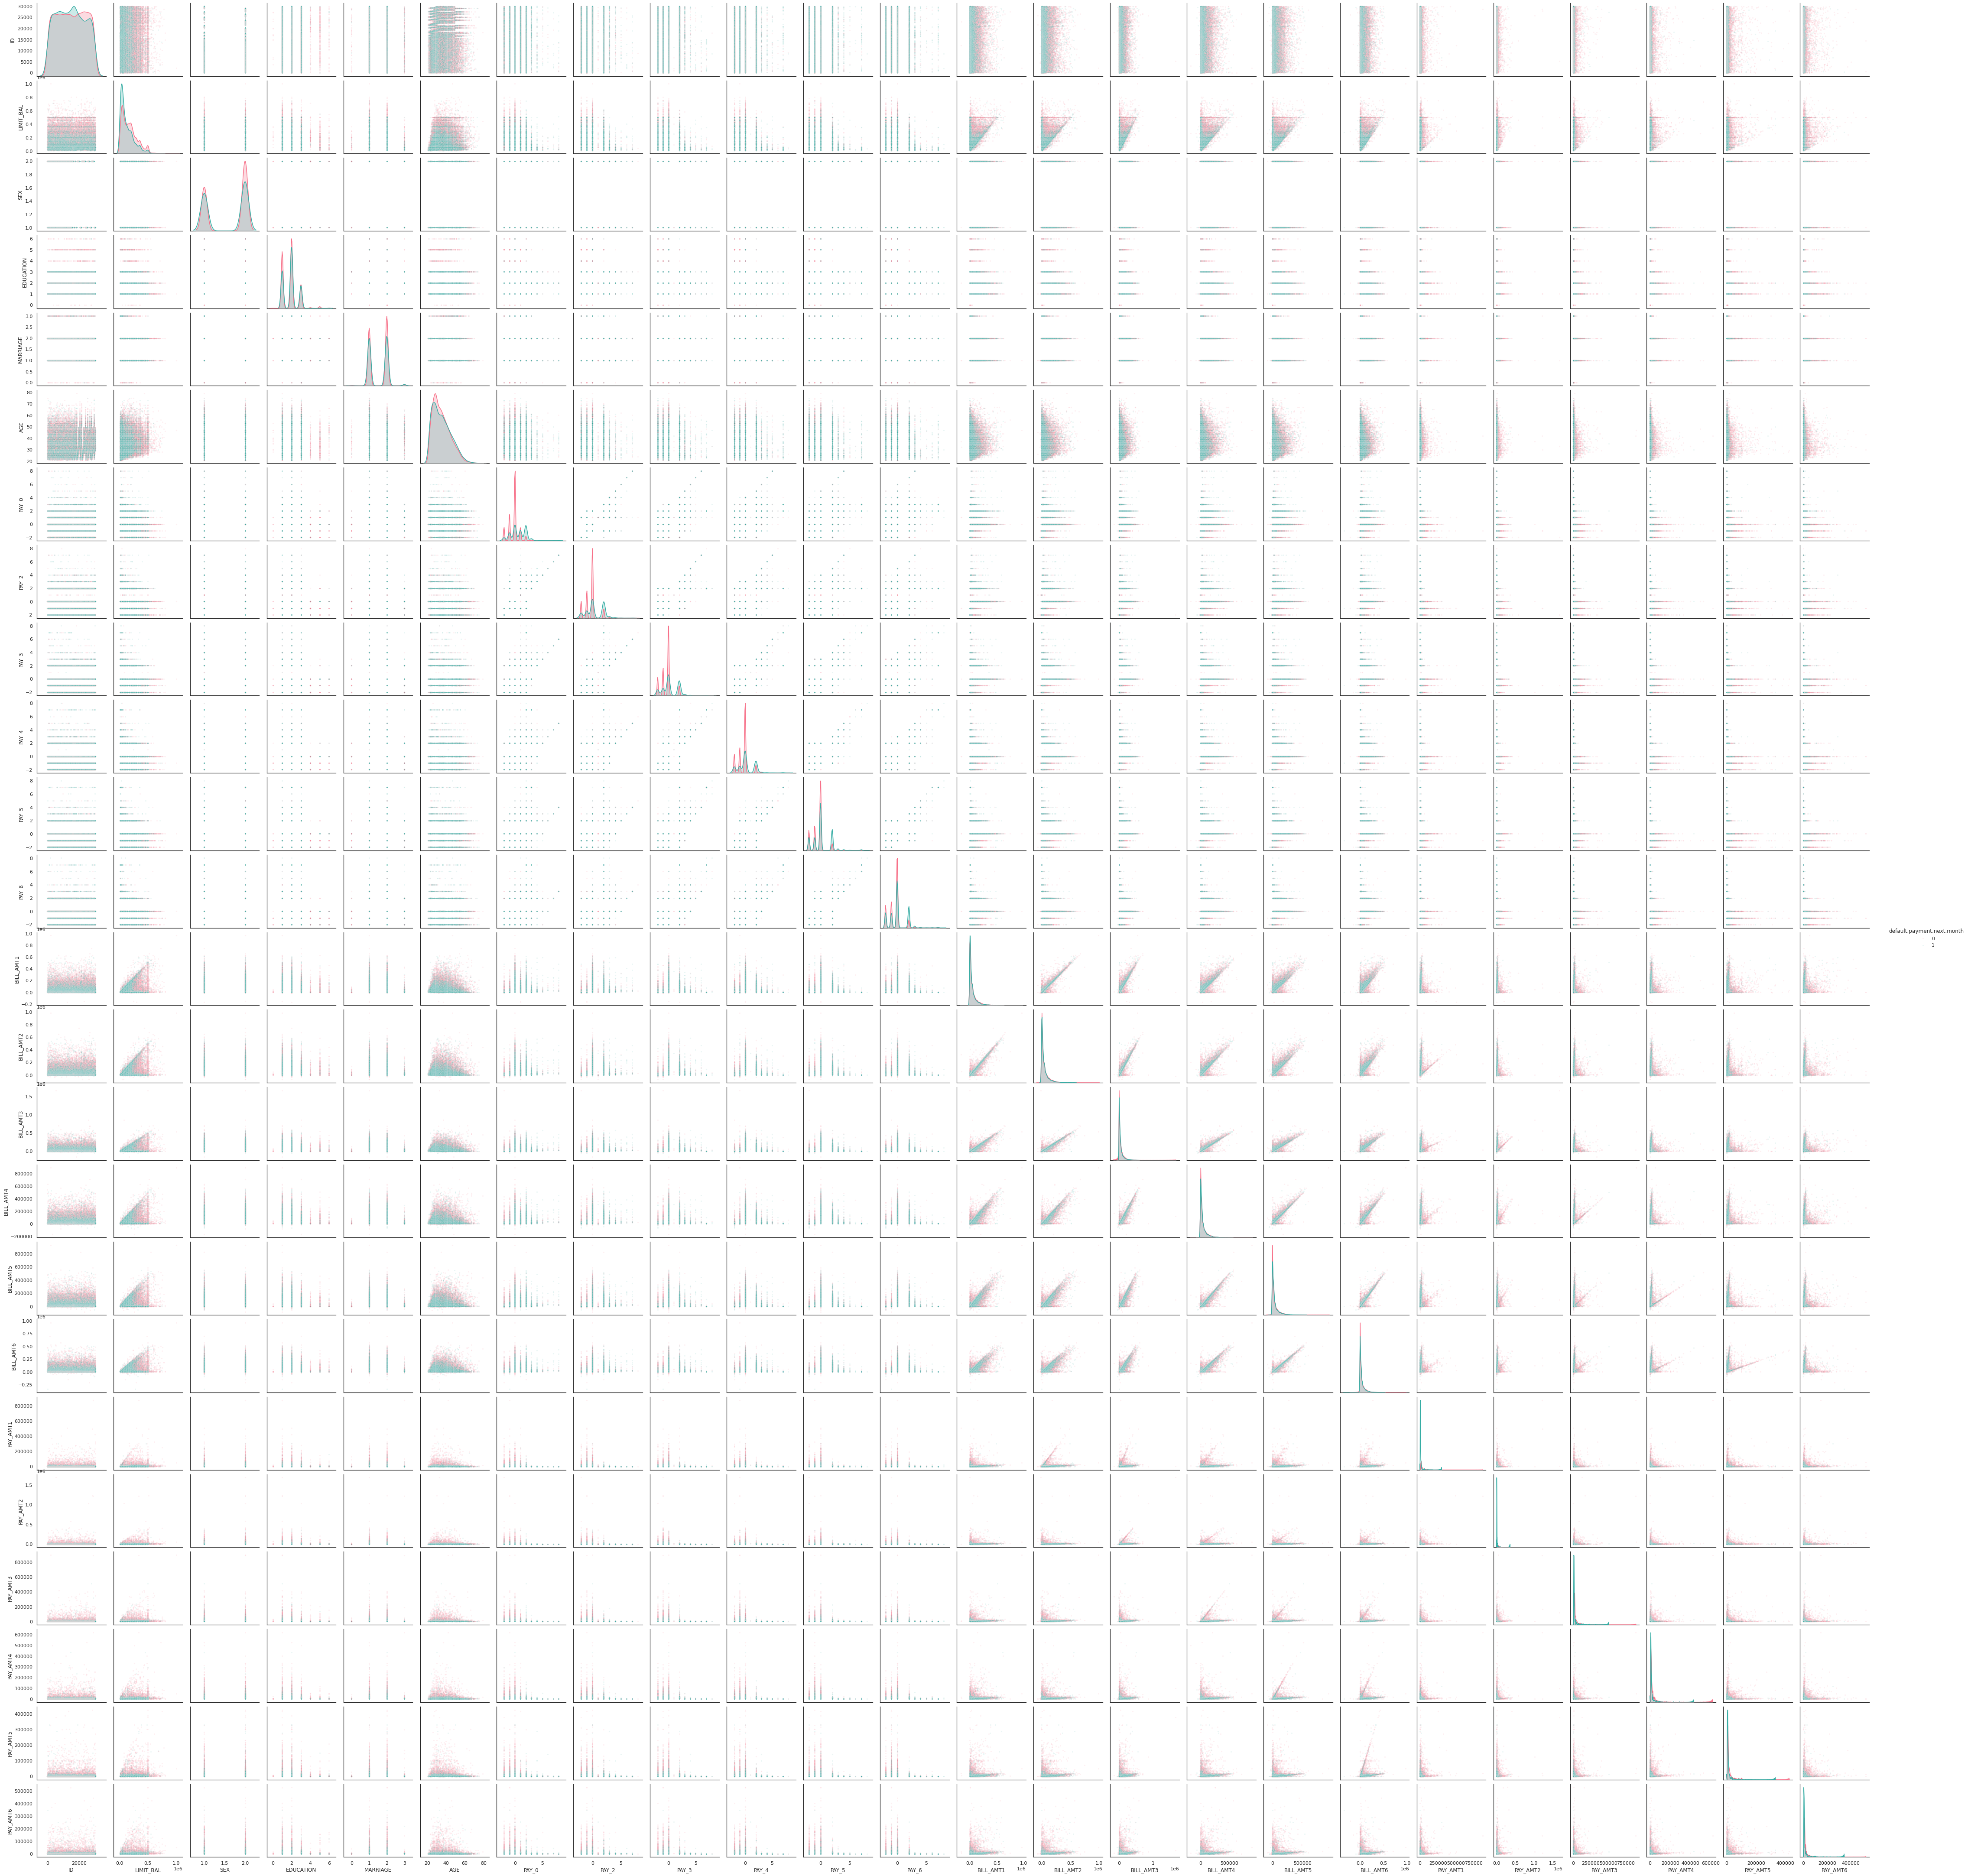

In [17]:
sns.pairplot(df,
             hue='default.payment.next.month', 
             palette = 'husl',
             plot_kws = dict(s=10, alpha = 0.1))